In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PRSA.csv to PRSA (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load Dataset

data = pd.read_csv('/content/PRSA.csv')
data

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [ ]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
data.tail()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [ ]:
data.isna().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [ ]:
data['pm2.5'].fillna(data['pm2.5'].mean(), inplace = True)

In [ ]:
data['cbwd'].unique()

array(['NW', 'cv', 'NE', 'SE'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['cbwd'] = labelencoder.fit_transform(data['cbwd'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmaxScaler = MinMaxScaler()

data['pm2.5'] = minmaxScaler.fit_transform(data[['pm2.5']])
data['Iws'] = minmaxScaler.fit_transform(data[['Iws']])

In [ ]:
data.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,0.099208,1.817246,12.448521,1016.447654,1.663267,0.040057,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,0.090396,14.433440,12.198613,10.268698,0.937981,0.085466,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.000000,0.000000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,0.031187,-10.000000,2.000000,1008.000000,1.000000,0.002290,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,0.077465,2.000000,14.000000,1016.000000,2.000000,0.008408,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,0.132797,15.000000,23.000000,1025.000000,2.000000,0.036674,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,1.000000,28.000000,42.000000,1046.000000,3.000000,1.000000,27.000000,36.000000


**Visualisations**

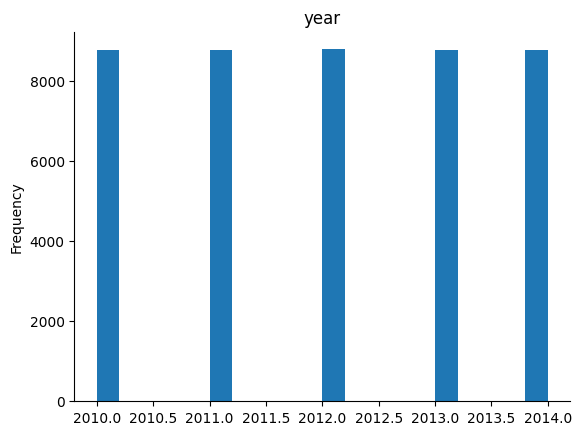

In [ ]:
data['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='year', ylabel='count'>

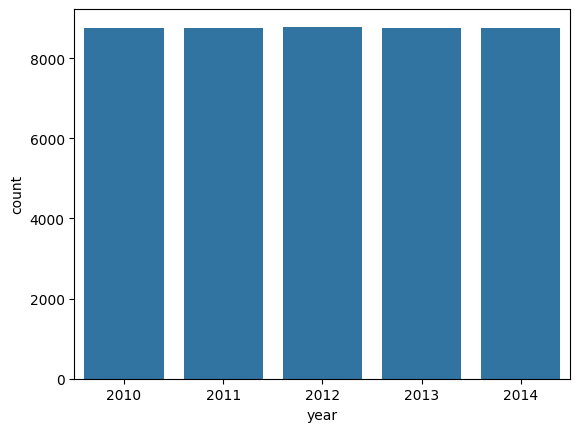

In [ ]:
sns.countplot(x=data['year'],data=data)

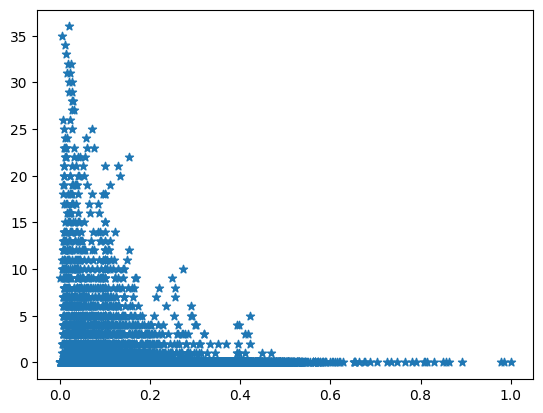

In [ ]:
plt.scatter(x=data['pm2.5'],y=data['Ir'],marker='*')

<Axes: xlabel='TEMP', ylabel='DEWP'>

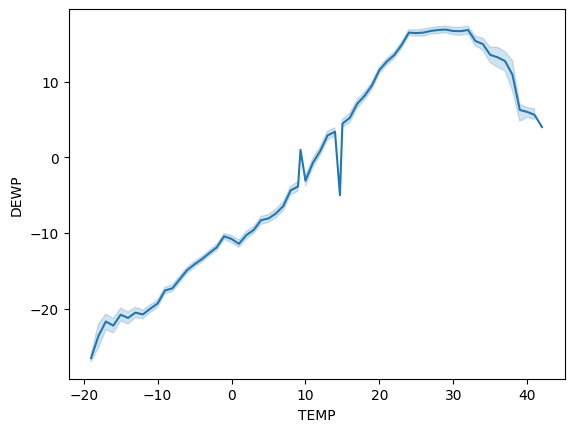

In [ ]:
sns.lineplot(x=data['TEMP'],y=data['DEWP'],data=data)

<Axes: xlabel='year', ylabel='pm2.5'>

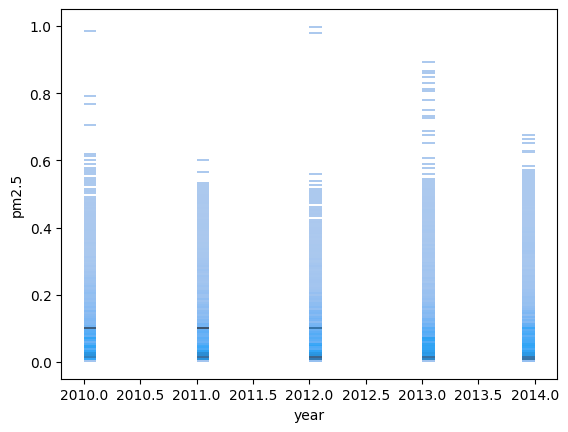

In [ ]:
sns.histplot(x=data['year'],y=data['pm2.5'],data=data)


**Model Implementation**
We'll implement both Ridge Regressor and Random Forest Regressor and tune their parameters using GridSearchCV

In [38]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [40]:
from sklearn.preprocessing import StandardScaler


In [ ]:
data = data.iloc[:,[0,1,2,3,4,6,7,8,9,10,11,12,5]]

In [ ]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
y = y.fillna(y.mean())

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 40)
print(x_train.shape)
print(x_test.shape)

(35059, 12)
(8765, 12)


In [ ]:
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())

Ridge Regressor

In [41]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [43]:
rr = Ridge(alpha=0.1)
rr.fit(x_train_scaled, y_train)

Ridge(alpha=0.1)

In [44]:
y_train_predict_rr = rr.predict(x_train_scaled)
y_test_predict_rr = rr.predict(x_test_scaled)

Random Forest Regressor

In [45]:
rfr = RandomForestRegressor(n_estimators=100,
                            max_depth=7,
                            max_features='auto',
                            min_samples_split=7,
                            min_samples_leaf=3)
rfr.fit(x_train,y_train)
y_train_predict_rfr = rfr.predict(x_train)
y_test_predict_rfr = rfr.predict(x_test)

In [46]:
mse = metrics.mean_squared_error(y_test,y_test_predict_rfr)
r2 = metrics.r2_score(y_test,y_test_predict_rfr)

print(np.sqrt(mse))
print(r2)

0.06394829321931421
0.48891556044441076


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params = {'max_depth':[3,4,5,6,7],
         'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9,10],
         'min_samples_leaf':[2,3,4,5,6,7,8,9,10],
          'n_estimators':[100,200,300,400,500]
         }
forest = RandomizedSearchCV(rfr, params, n_jobs=-1,cv=5, verbose=2)
forest.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=7,
                                                   max_features='auto',
                                                   min_samples_leaf=3,
                                                   min_samples_split=7),
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [ ]:
y_train_predict_rfr_1 = forest.predict(x_train)
y_test_predict_rfr_1 = forest.predict(x_test)


mse = metrics.mean_squared_error(y_test,y_test_predict_rfr_1)
r2 = metrics.r2_score(y_test,y_test_predict_rfr_1)

print(np.sqrt(mse))
print(r2)

0.06408663580406132
0.48670185876745464


**Model Evaluation**
Evaluate the models using MAE, MSE, and RMSE:

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
print("Ridge Regressor Model Performance: \n")

print("------------------Training Performance:----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_rr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_rr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_rr)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_rr))

Ridge Regressor Model Performance: 

------------------Training Performance:----------------
Mean Absolute Error        : 0.056467502754768556
Mean Squared Error         : 0.006112593127551968
Root Mean Squared Error    : 0.07818307443143924
R2 Score                   : 0.25579640765008393


In [ ]:
print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_rr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_rr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_rr)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_rr))


-----------------Testing Performance:-----------------
Mean Absolute Error        : 0.05574524788438794
Mean Squared Error         : 0.005865245482563309
Root Mean Squared Error    : 0.07658489069368259
R2 Score                   : 0.2669713703690656


In [ ]:
print("Random Forest Regressor Model Performance: \n")

print("------------------Training Performance:----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_rfr_1))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_rfr_1))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_rfr_1)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_rfr_1))

Random Forest Regressor Model Performance: 

------------------Training Performance:----------------
Mean Absolute Error        : 0.04491530593205185
Mean Squared Error         : 0.004075082302138957
Root Mean Squared Error    : 0.06383637131086757
R2 Score                   : 0.5038618103495561


In [ ]:
print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_rfr_1))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_rfr_1))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_rfr_1)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_rfr_1))


-----------------Testing Performance:-----------------
Mean Absolute Error        : 0.045650255951261175
Mean Squared Error         : 0.0041070968886823935
Root Mean Squared Error    : 0.06408663580406132
R2 Score                   : 0.48670185876745464


**Cross Validation and Overfitting Check**

In [ ]:
cv_scores = cross_val_score(rfr, x, y, scoring='neg_mean_squared_error', cv=5)
cv_r2_scores = cross_val_score(rfr, x, y, scoring='r2', cv=5)

# Calculate the mean R2 value
mean_cv_r2 = np.mean(cv_r2_scores)
cv_rmse_scores = np.sqrt(-cv_scores)
mean_cv_rmse = cv_rmse_scores.mean()
std_cv_rmse = cv_rmse_scores.std()


print("Cross-Validation RMSE Scores:")
print(cv_rmse_scores)
print("\nMean Cross-Validation RMSE:", mean_cv_rmse)
print("Standard Deviation of Cross-Validation RMSE:", std_cv_rmse)
print("Cross-Validation R-squared (R2) Scores:")
print(cv_r2_scores)
print("\nMean Cross-Validation R-squared (R2):", mean_cv_r2)

Cross-Validation RMSE Scores:
[0.0740829  0.07248594 0.06497636 0.08061282 0.07880086]

Mean Cross-Validation RMSE: 0.07419177558723702
Standard Deviation of Cross-Validation RMSE: 0.0054830487671418985
Cross-Validation R-squared (R2) Scores:
[0.31359663 0.34459756 0.33453063 0.32125255 0.29103666]

Mean Cross-Validation R-squared (R2): 0.3210028063758352


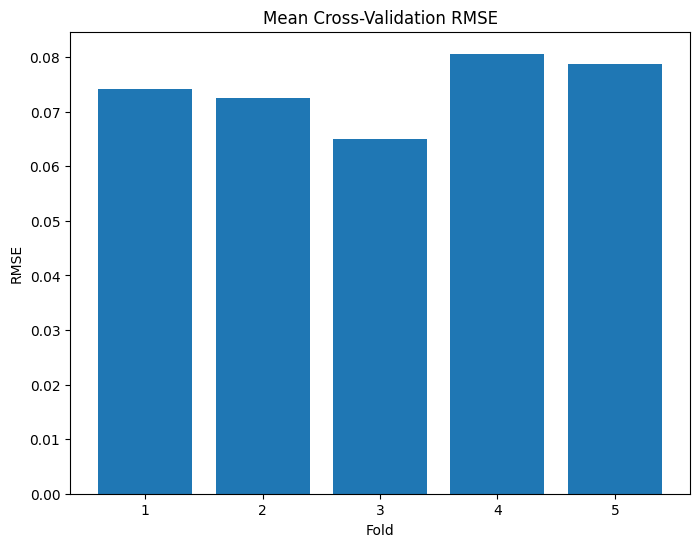

In [ ]:
# Bar Plot of Mean Cross-Validation RMSE
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), cv_rmse_scores)
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Mean Cross-Validation RMSE')
plt.show()

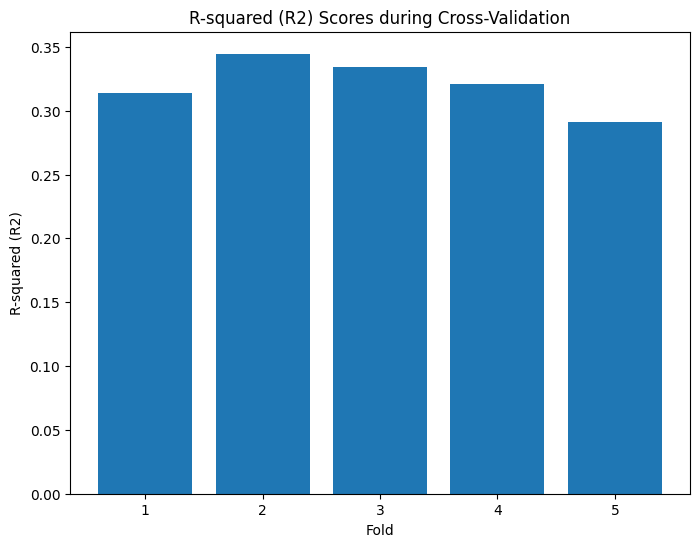

In [ ]:
# Bar Plot of R-squared (R2) Scores during Cross-Validation
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), cv_r2_scores)
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('R-squared (R2)')
plt.title('R-squared (R2) Scores during Cross-Validation')
plt.show()